# Time Series Decomposition and stationarity Check

# Worked on it on 24 Aug 2021

# Additive time series

* value= base_level+trend+seasonility+Error

# Multipliplicative time series

* value= base_level * trend * seasonility * Error

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd

In [13]:
# import data
# Australian drug sale

drug= pd.read_csv("drug1.csv", parse_dates=["date"], index_col="date")

In [14]:
drug

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [15]:
drug.reset_index(inplace=True)

In [16]:
drug

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


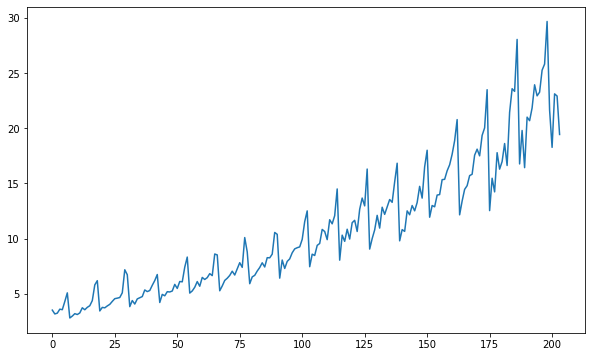

In [19]:
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.figsize": (10,6)})
plt.plot(drug["value"])

In [21]:
# multiplicative decomposition
mul_result=seasonal_decompose(drug["value"],model="multiplicative",period=1)

# Additive decomposion
add_result=seasonal_decompose(drug["value"],model="additive",period=1)

Text(0.5, 0.98, '\nmultiplicative decompose')

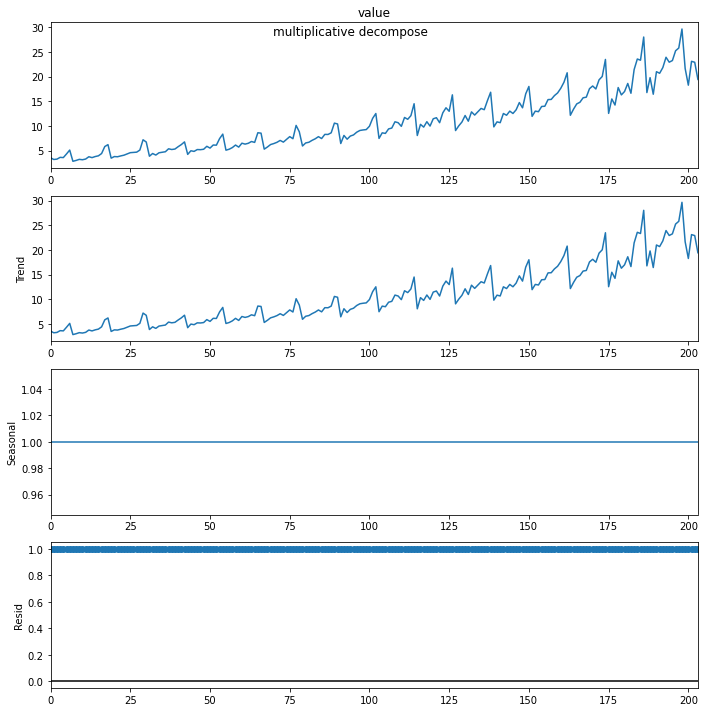

In [23]:
# plot

plt.rcParams.update({"figure.figsize":(10,10)})
mul_result.plot().suptitle('\nmultiplicative decompose', fontsize=12)

Text(0.5, 0.98, '\nadditive decompose')

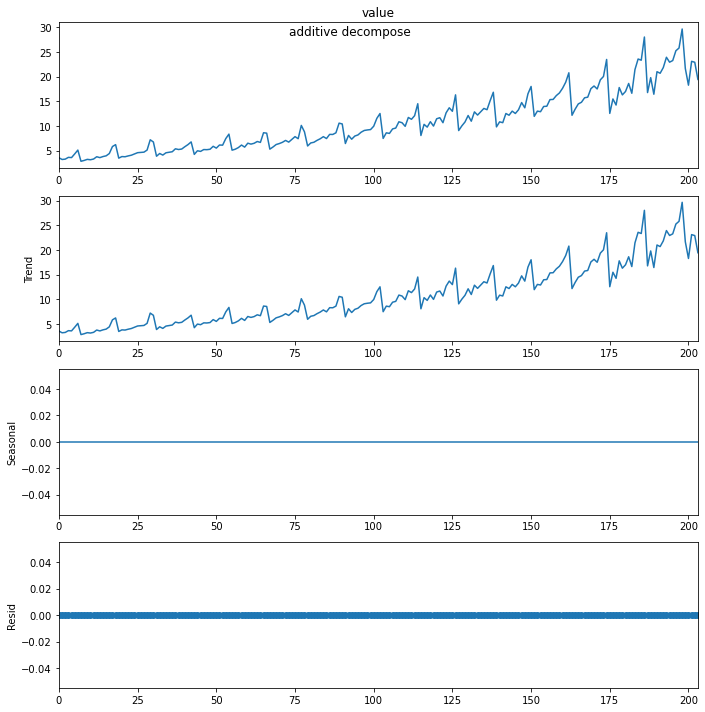

In [24]:
# plot

plt.rcParams.update({"figure.figsize":(10,10)})
add_result.plot().suptitle('\nadditive decompose', fontsize=12)

In [27]:
# Additive

new_df_add=pd.concat([add_result.seasonal,add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add.columns=["seasonality","trend","residual","actual_values"]
new_df_add.head(5)

,seasonality,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869


In [28]:
# multiplicative

new_df_mul=pd.concat([mul_result.seasonal,mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
new_df_mul.columns=["seasonality","trend","residual","actual_values"]
new_df_mul.head(5)

,seasonality,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869


# Adfuller test for stationary

# Definition of stationarity= constant mean and variance

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
# ADF test null hypothesis : non stationary if p-value <5% reject null hypothesis

adfuller_result=adfuller(drug["value"].values, autolag="AIC")

In [38]:
print(f"ADF Statistic: {adfuller_result[0]}")
print(f"p-value: {adfuller_result[1]}")

ADF Statistic: 3.14518568930673
p-value: 1.0


In [39]:
for key, value in adfuller_result[4].items():
    print("Critical values:")
    print(f"  {key},{value} ")

Critical values:
  1%,-3.465620397124192 
Critical values:
  5%,-2.8770397560752436 
Critical values:
  10%,-2.5750324547306476 
